**[MSE-01]** モジュールをインポートして、乱数のシードを設定します。

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data

np.random.seed(20160604)

/Users/seijisuzuki/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/seijisuzuki/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/seijisuzuki/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)]

**[MSE-02]** MNISTのデータセットを用意します。

In [2]:
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


**[MSE-03]** ソフトマックス関数による確率 p の計算式を用意します。

In [6]:
x = tf.placeholder(tf.float32, [None, 784])
w = tf.Variable(tf.zeros([784, 10]))
w0 = tf.Variable(tf.zeros([10]))
f = tf.matmul(x, w) + w0
p = tf.nn.softmax(f)

**[MSE-04]** 誤差関数 loss とトレーニングアルゴリズム train_step を用意します。

In [7]:
t = tf.placeholder(tf.float32, [None, 10])
loss = -tf.reduce_sum(t * tf.log(p))
train_step = tf.train.AdamOptimizer().minimize(loss)

**[MSE-05]** 正解率 accuracy を定義します。

In [8]:
correct_prediction = tf.equal(tf.argmax(p, 1), tf.argmax(t, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

**[MSE-06]** セッションを用意して、Variableを初期化します。

In [10]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

**[MSE-07]** パラメーターの最適化を2000回繰り返します。

1回の処理において、トレーニングセットから取り出した100個のデータを用いて、勾配降下法を適用します。

最終的に、テストセットに対して約92%の正解率が得られます。

In [11]:
i = 0
for _ in range(2000):
    i += 1
    batch_xs, batch_ts = mnist.train.next_batch(100)
    sess.run(train_step, feed_dict={x: batch_xs, t: batch_ts})
    if i % 100 == 0:
        loss_val, acc_val = sess.run([loss, accuracy],
            feed_dict={x:mnist.test.images, t: mnist.test.labels})
        print ('Step: %d, Loss: %f, Accuracy: %f'
               % (i, loss_val, acc_val))

Step: 100, Loss: 7589.938477, Accuracy: 0.848800
Step: 200, Loss: 5360.587891, Accuracy: 0.880300
Step: 300, Loss: 4532.035156, Accuracy: 0.892200
Step: 400, Loss: 4096.293457, Accuracy: 0.898400
Step: 500, Loss: 3802.896973, Accuracy: 0.902700
Step: 600, Loss: 3584.108154, Accuracy: 0.906900
Step: 700, Loss: 3442.541748, Accuracy: 0.909500
Step: 800, Loss: 3334.687012, Accuracy: 0.910800
Step: 900, Loss: 3252.657471, Accuracy: 0.912700
Step: 1000, Loss: 3177.819824, Accuracy: 0.913100
Step: 1100, Loss: 3114.383301, Accuracy: 0.915200
Step: 1200, Loss: 3091.039551, Accuracy: 0.915800
Step: 1300, Loss: 3042.649414, Accuracy: 0.915100
Step: 1400, Loss: 3006.470215, Accuracy: 0.917200
Step: 1500, Loss: 2987.438721, Accuracy: 0.917800
Step: 1600, Loss: 2919.470215, Accuracy: 0.918600
Step: 1700, Loss: 2900.669922, Accuracy: 0.918400
Step: 1800, Loss: 2885.908203, Accuracy: 0.920100
Step: 1900, Loss: 2866.136230, Accuracy: 0.920100
Step: 2000, Loss: 2855.447754, Accuracy: 0.921700


**[MSE-08]** この時点のパラメーターを用いて、テストセットに対する予測を表示します。

ここでは、「０」〜「９」の数字に対して、正解と不正解の例を３個ずつ表示します。

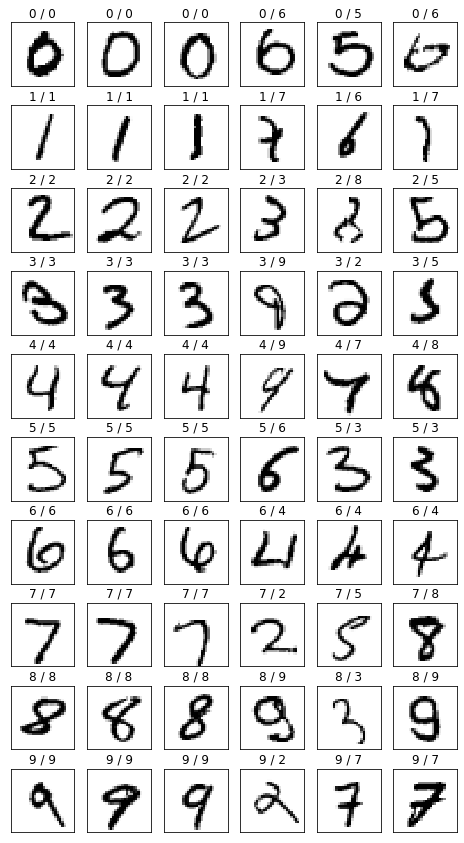

In [12]:
images, labels = mnist.test.images, mnist.test.labels
p_val = sess.run(p, feed_dict={x:images, t: labels}) 

fig = plt.figure(figsize=(8,15))
for i in range(10):
    c = 1
    for (image, label, pred) in zip(images, labels, p_val):
        prediction, actual = np.argmax(pred), np.argmax(label)
        if prediction != i:
            continue
        if (c < 4 and i == actual) or (c >= 4 and i != actual):
            subplot = fig.add_subplot(10,6,i*6+c)
            subplot.set_xticks([])
            subplot.set_yticks([])
            subplot.set_title('%d / %d' % (prediction, actual))
            subplot.imshow(image.reshape((28,28)), vmin=0, vmax=1,
                           cmap=plt.cm.gray_r, interpolation="nearest")
            c += 1
            if c > 6:
                break